<a href="https://colab.research.google.com/github/Fernanfds/Fernanfds/blob/main/SeriesTemporais_com_MonteCarlo_Python_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregar os Pacotes Nescessarios


In [2]:
import yfinance as yF

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

pd.options.display.float_format = '{:.2f}'.format


Carregando os Dados

In [12]:
Cotacoes = yF.Ticker('PETR4.SA')

dados = Cotacoes.history(period = '2y')

dados.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-13 00:00:00-03:00,19.68,19.99,19.41,19.49,88327800,0.00,0.00
2022-09-14 00:00:00-03:00,19.55,19.99,19.48,19.79,49039700,0.00,0.00
2022-09-15 00:00:00-03:00,19.66,19.86,19.59,19.75,45553200,0.00,0.00
2022-09-16 00:00:00-03:00,19.62,19.68,19.29,19.57,107303600,0.00,0.00
2022-09-19 00:00:00-03:00,19.40,19.96,19.00,19.89,65559900,0.00,0.00


In [13]:
dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Volume']

dados.head()

,Abertura,Maximo,Minimo,Fechamento,Volume
Date,,,,,
2022-09-13 00:00:00-03:00,19.68,19.99,19.41,19.49,88327800
2022-09-14 00:00:00-03:00,19.55,19.99,19.48,19.79,49039700
2022-09-15 00:00:00-03:00,19.66,19.86,19.59,19.75,45553200
2022-09-16 00:00:00-03:00,19.62,19.68,19.29,19.57,107303600
2022-09-19 00:00:00-03:00,19.40,19.96,19.00,19.89,65559900


In [14]:
# Vamos Observar nosso Range de Dados
print('Menor data', dados.index.min())
print('Maior data', dados.index.max())

Menor data 2022-09-13 00:00:00-03:00
Maior data 2024-09-13 00:00:00-03:00


In [15]:
display(dados.loc[dados.index.max()])

,2024-09-13 00:00:00-03:00
Abertura,37.11
Maximo,37.55
Minimo,36.59
Fechamento,36.70
Volume,34729600.00


In [16]:
retorno_diario = dados['Fechamento'].pct_change().dropna()
retorno_diario.head()

,Fechamento
Date,
2022-09-14 00:00:00-03:00,0.02
2022-09-15 00:00:00-03:00,-0.00
2022-09-16 00:00:00-03:00,-0.01
2022-09-19 00:00:00-03:00,0.02
2022-09-20 00:00:00-03:00,-0.01


In [17]:
dados = pd.merge(dados, retorno_diario, how = 'inner', on = 'Date')
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Volume', 'Retorno_diario']
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Volume,Retorno_diario
Date,,,,,,
2022-09-14 00:00:00-03:00,19.55,19.99,19.48,19.79,49039700,0.02
2022-09-15 00:00:00-03:00,19.66,19.86,19.59,19.75,45553200,-0.00
2022-09-16 00:00:00-03:00,19.62,19.68,19.29,19.57,107303600,-0.01
2022-09-19 00:00:00-03:00,19.40,19.96,19.00,19.89,65559900,0.02
2022-09-20 00:00:00-03:00,19.98,20.10,19.61,19.77,67798200,-0.01


In [18]:
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Volume,Retorno_diario
Date,,,,,,
2022-09-14 00:00:00-03:00,19.55,19.99,19.48,19.79,49039700,0.02
2022-09-15 00:00:00-03:00,19.66,19.86,19.59,19.75,45553200,-0.00
2022-09-16 00:00:00-03:00,19.62,19.68,19.29,19.57,107303600,-0.01
2022-09-19 00:00:00-03:00,19.40,19.96,19.00,19.89,65559900,0.02
2022-09-20 00:00:00-03:00,19.98,20.10,19.61,19.77,67798200,-0.01


In [19]:
dados.shape

(501, 6)

In [20]:
dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume,Retorno_diario
count,501.00,501.00,501.00,501.00,501.00,501.00
mean,27.12,27.48,26.79,27.14,56741724.55,0.00
std,7.85,7.88,7.83,7.85,34779638.55,0.02
min,14.29,15.04,14.13,14.61,12826700.00,-0.09
25%,18.69,18.96,18.20,18.63,33583600.00,-0.01
50%,28.38,28.64,28.16,28.36,47685700.00,0.00
75%,34.79,35.19,34.53,34.80,68814800.00,0.01
max,39.65,39.86,39.28,39.60,319501600.00,0.08


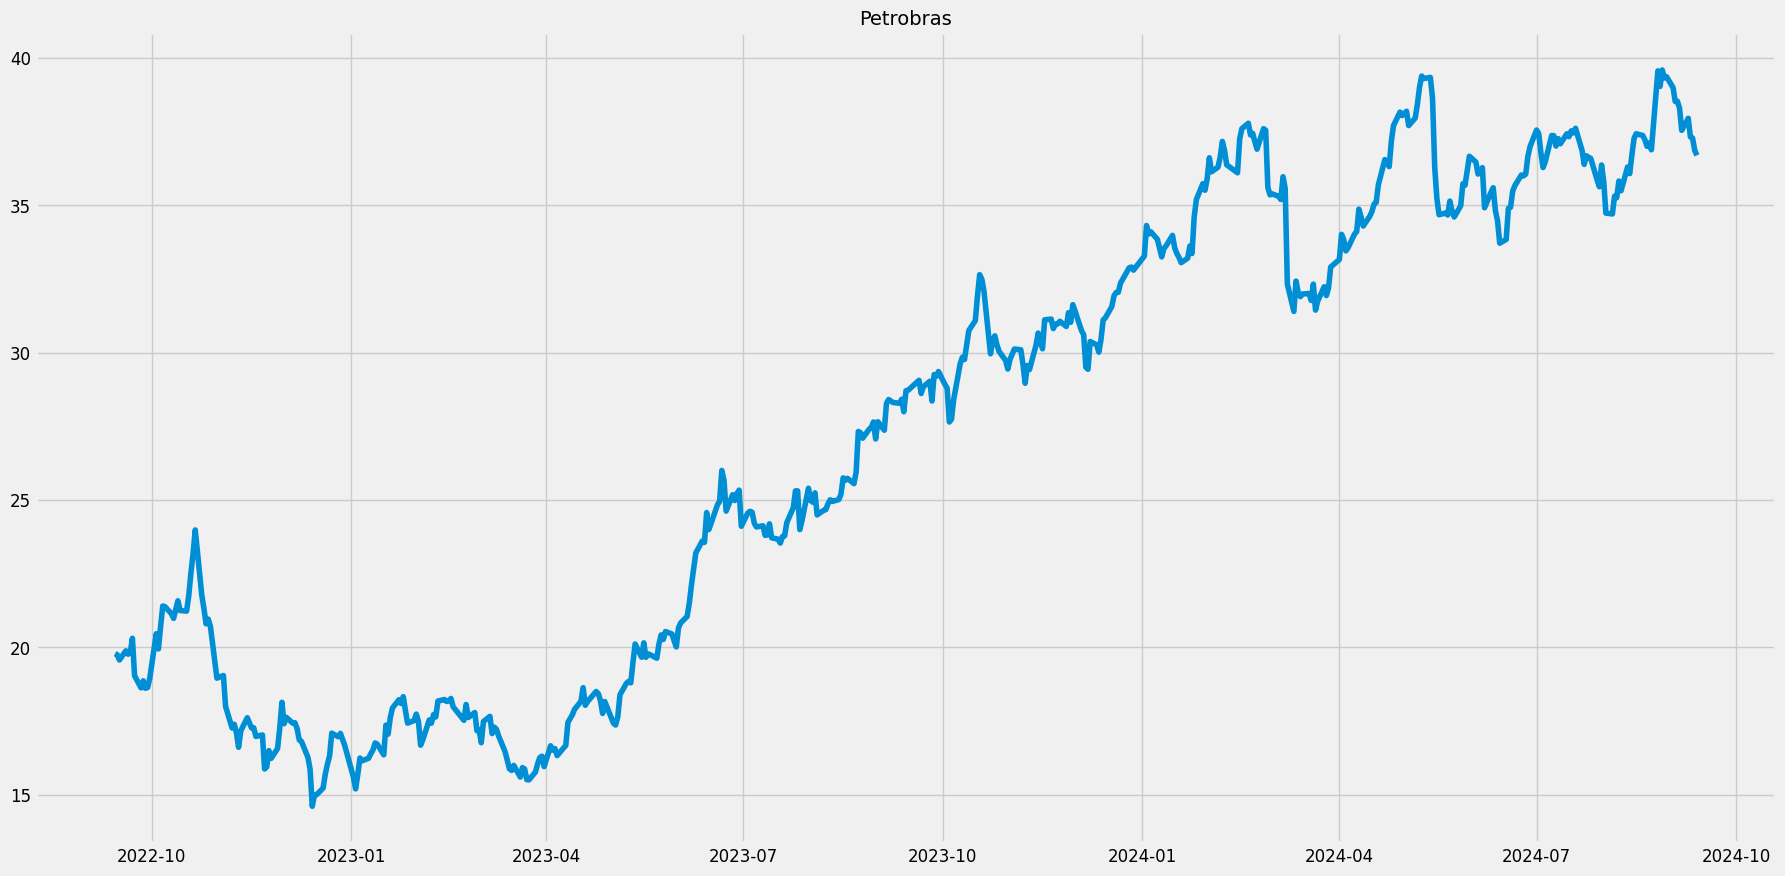

In [21]:
# Plot

plt.plot(dados['Fechamento'])
plt.title('Petrobras', size = 14)
plt.show()



In [22]:
# Retorno Acumulado
retorno_diario_acumulado = (1 + dados['Retorno_diario']).cumprod() -1

retorno_diario_acumulado.max()

1.031715891374096

### Análise Exploratória e Estatística Descritiva


In [23]:
# Media do Fechamento Diário da Cotação das Ações

media_retorno_diario = np.mean(retorno_diario)
print('Média do Retorno Diário: ', media_retorno_diario)

Média do Retorno Diário:  0.0014943277168231247


In [24]:
# Desvio Padrão do Fcehamento Diário da Cotação das Ações

desvio_retorno_diario = np.std(retorno_diario)
print('Desvio Padrão do Retorno Diário: ', desvio_retorno_diario)


Desvio Padrão do Retorno Diário:  0.021383633245108027


In [26]:
# Media e Desvio Padrão no Ano (Conseiderando 364 dias de Operações)
print("Retorno Medio Anualizado de Fechamento: ", (1 + media_retorno_diario) ** 364 - 1)
print("Desvio Padrão Anualizado de Fechamento: ", desvio_retorno_diario * np.sqrt(364))

Retorno Medio Anualizado de Fechamento:  0.7220738384420093
Desvio Padrão Anualizado de Fechamento:  0.407973720424624


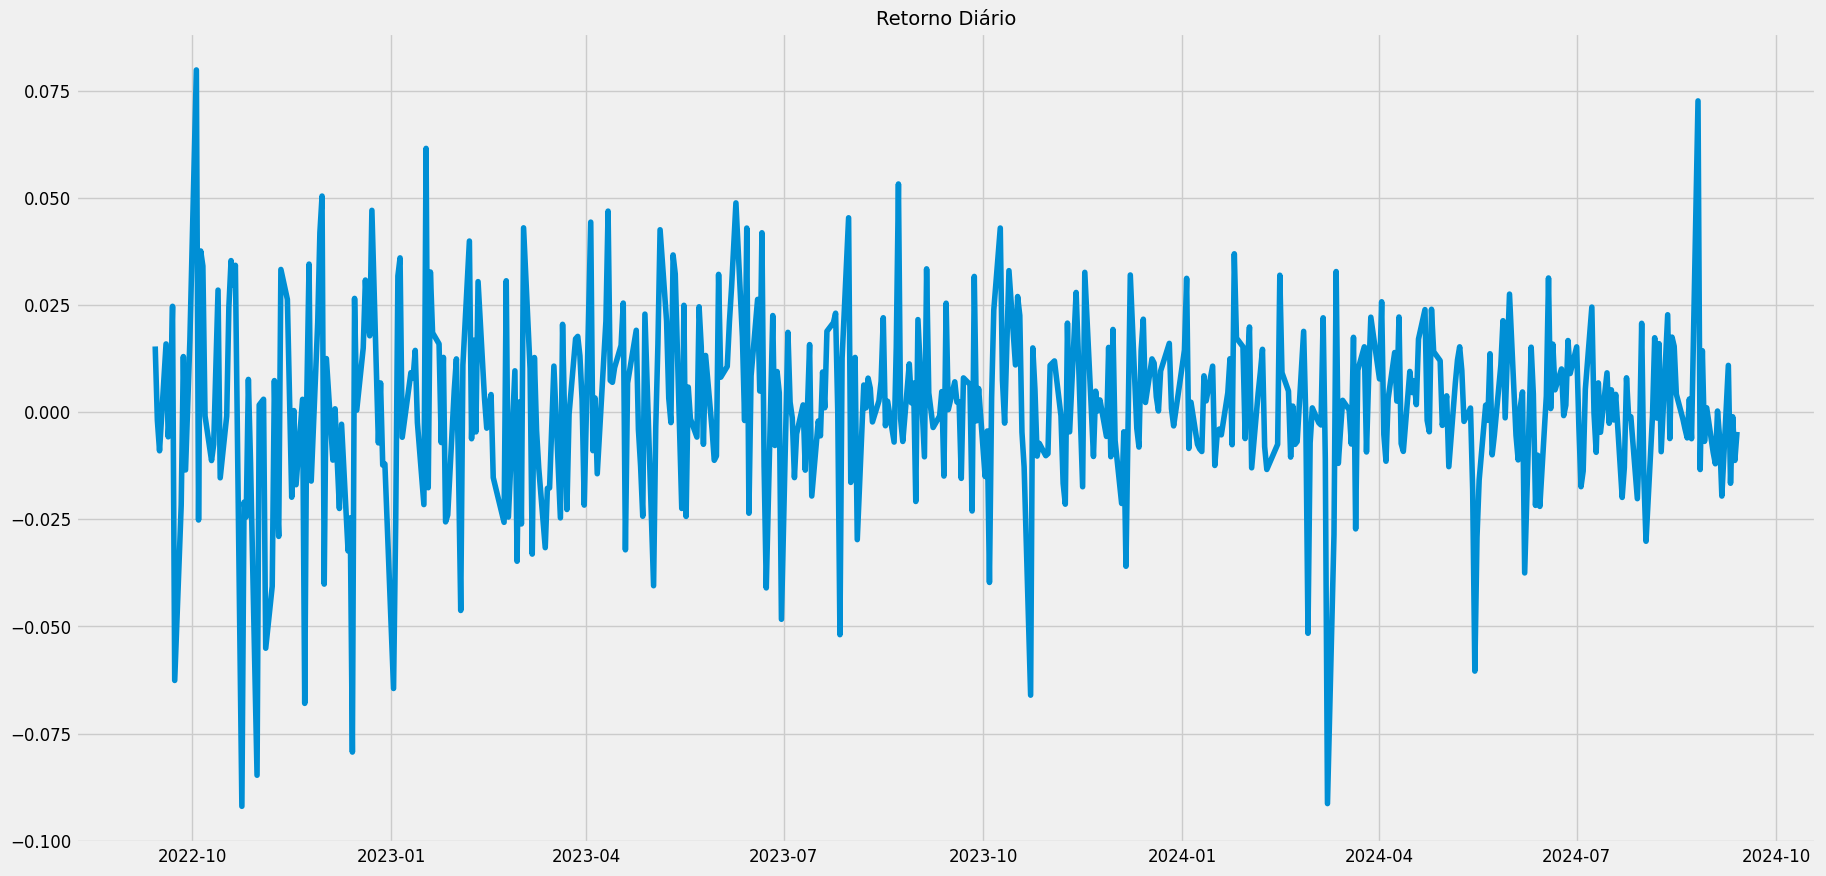

In [27]:
plt.plot(retorno_diario)
plt.title('Retorno Diário', size = 14)
plt.show()

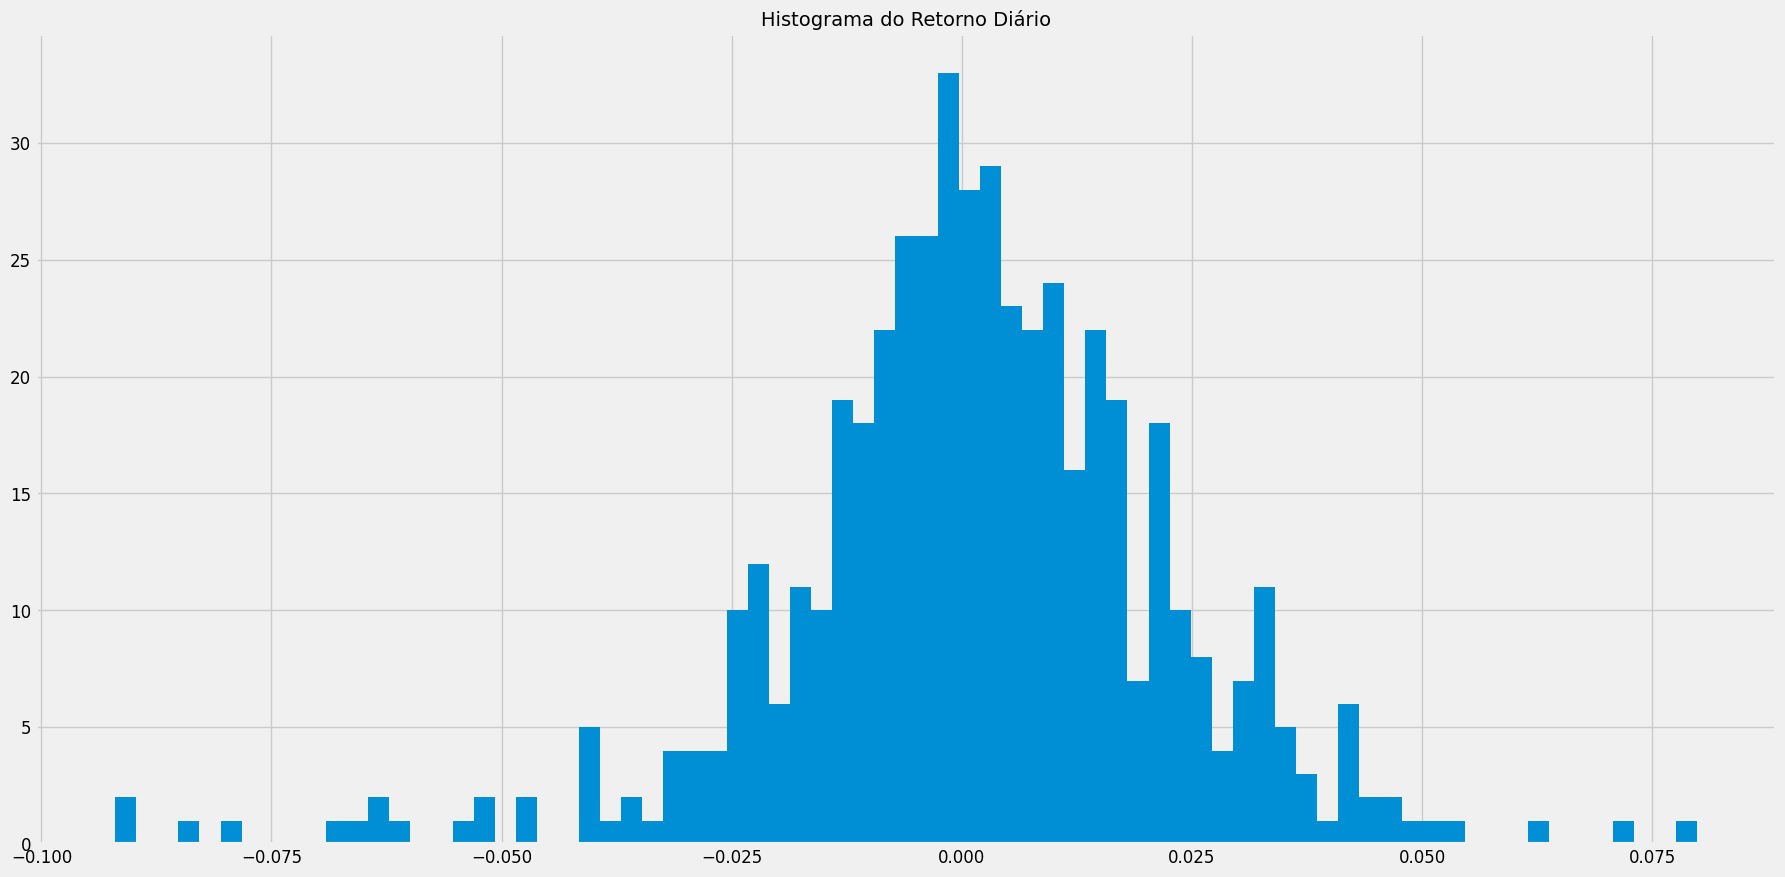

In [28]:
plt.hist(retorno_diario, bins = 75)
plt.title('Histograma do Retorno Diário', size = 14)
plt.show()

In [29]:
log_retorno_diario = (np.log(dados['Fechamento']) - np.log(dados['Fechamento']).shift(-1)).dropna()
log_media_retorno_diario = np.mean(log_retorno_diario)
log_desvio_retorno_diario = np.std(log_retorno_diario)

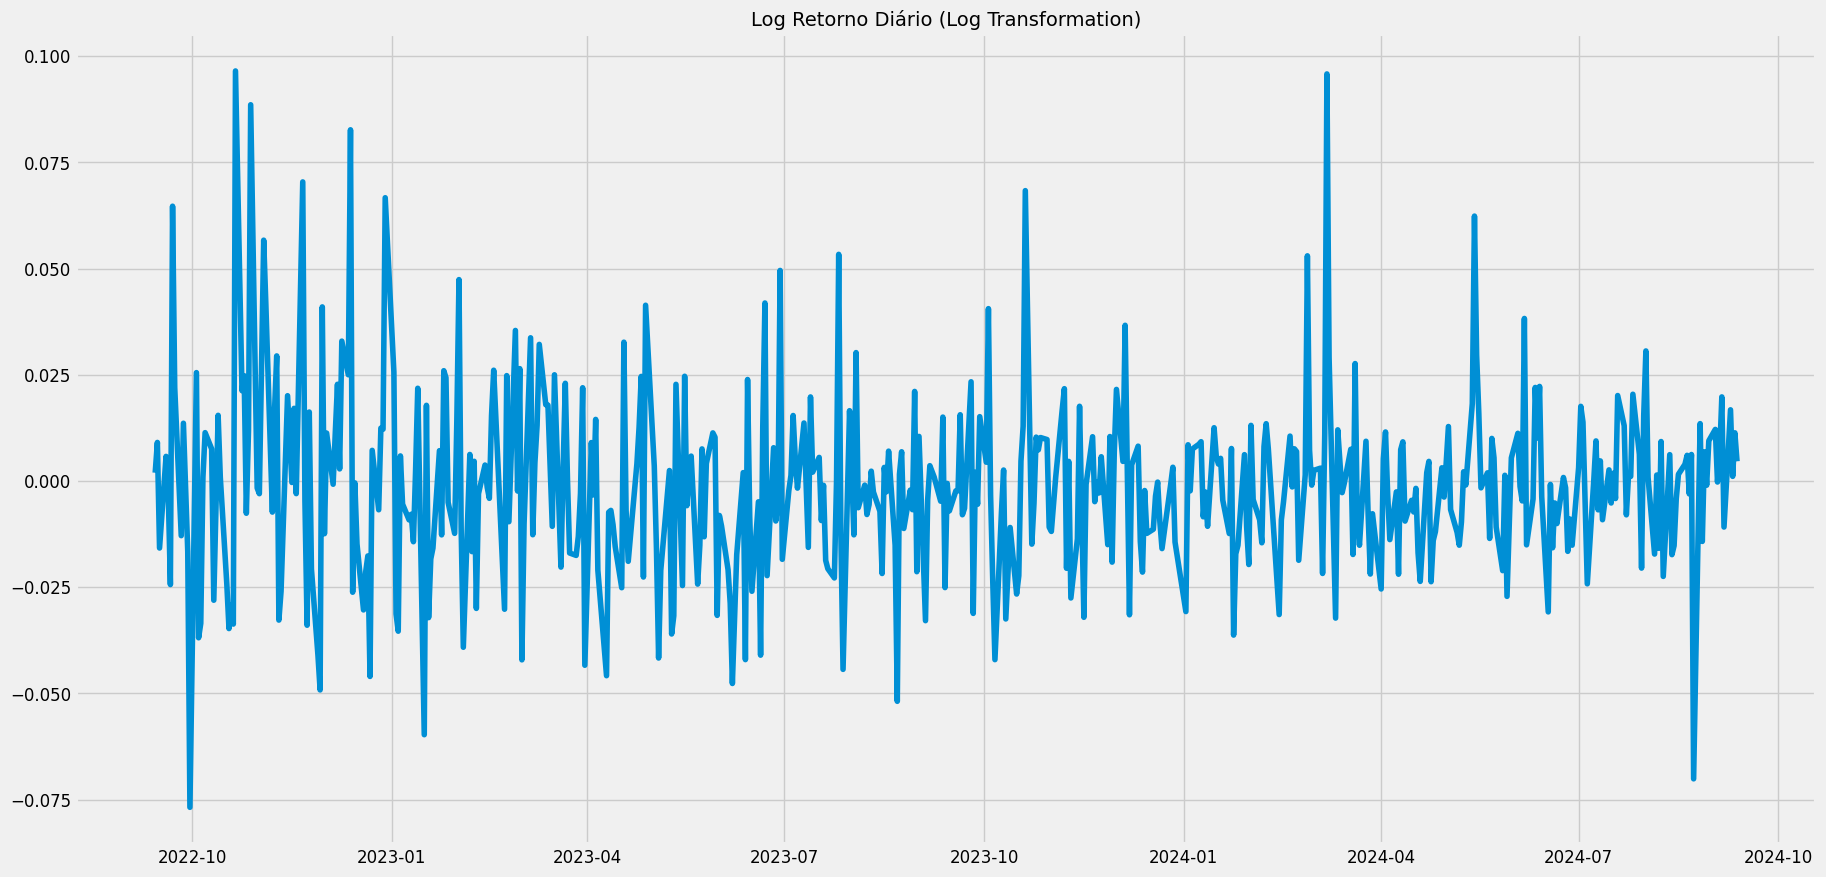

In [32]:
plt.plot(log_retorno_diario)
plt.title('Log Retorno Diário (Log Transformation)', size = 14)
plt.show()

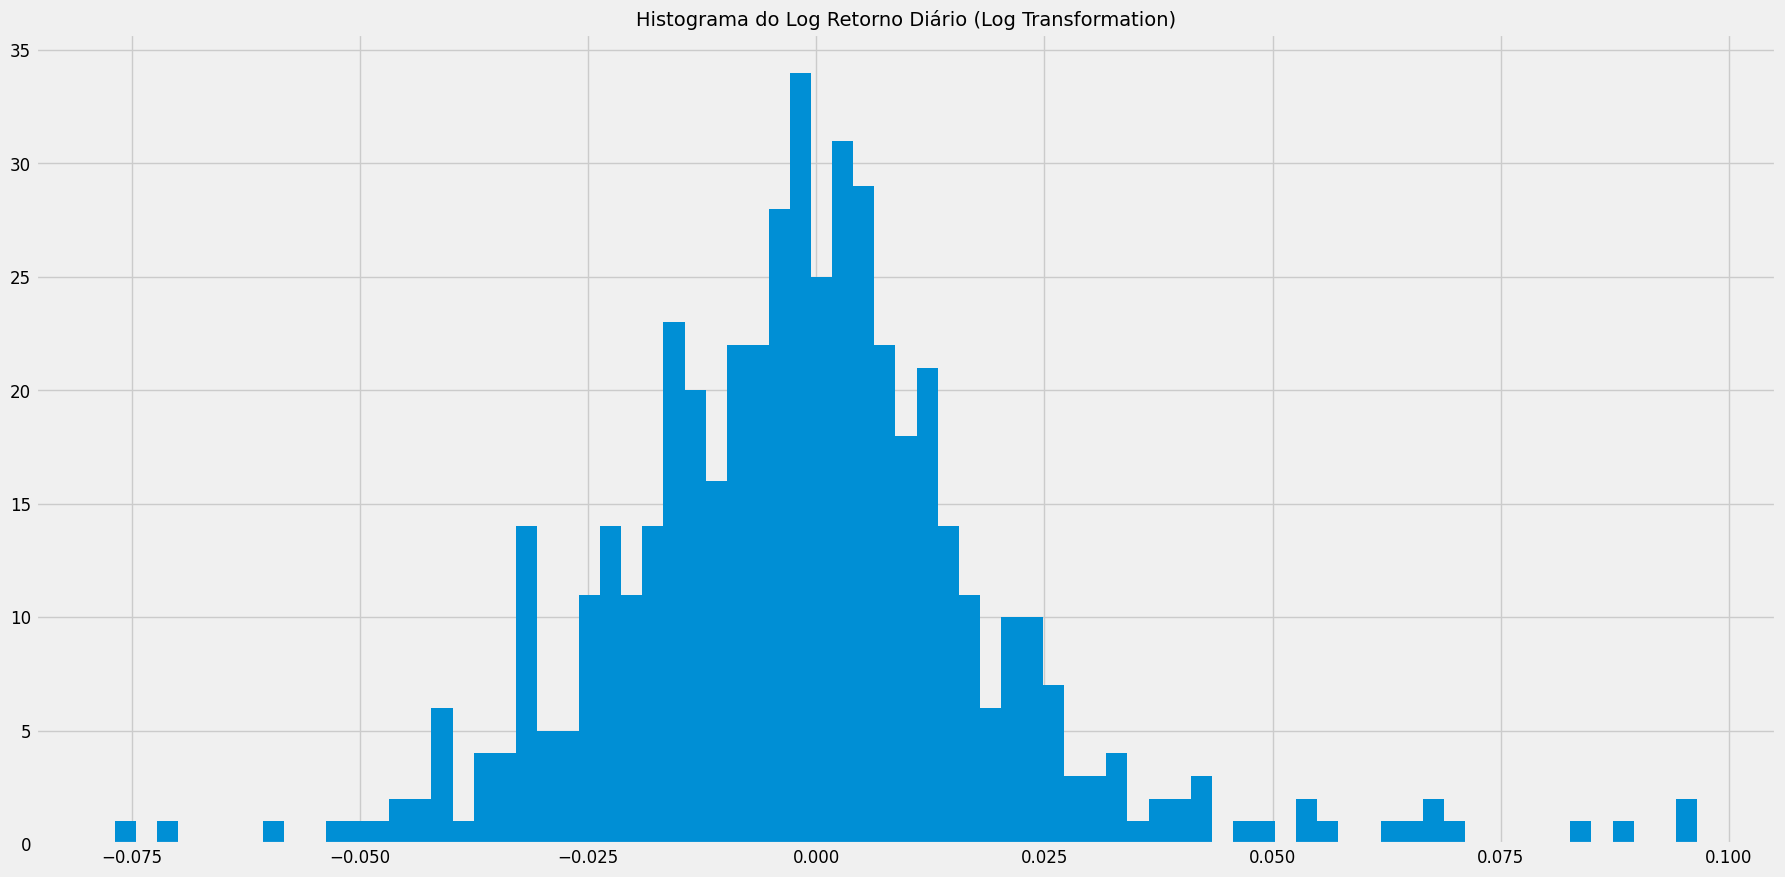

In [31]:
plt.hist(log_retorno_diario, bins = 75)
plt.title('Histograma do Log Retorno Diário (Log Transformation)', size = 14)
plt.show()

### Valor Historico


In [33]:
var_level = 95
var = np.percentile(retorno_diario, 100 - var_level)
print("Certeza de que as perdas diárias não excederão o var% em um determinado dia com base em valores históricos.")
print('VAR 95%:', var)

Certeza de que as perdas diárias não excederão o var% em um determinado dia com base em valores históricos.
VAR 95%: -0.0316252687906553


In [34]:
# Var para os proximos 5 dias

var * np.sqrt(5)

-0.07071625082260782

### Valor Historico Condicional


In [35]:
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
cvar = log_retorno_diario[log_retorno_diario < var].mean()
print("Nos Piores 5% dos Casos, as Perdas Foram, em Media, Superiores ao Percentual Histórico.")
print('CVar 95%:', cvar)

Nos Piores 5% dos Casos, as Perdas Foram, em Media, Superiores ao Percentual Histórico.
CVar 95%: -0.04419428116541578


Monte Carlo Simulation

In [44]:
dias_posteriores = 180

simulacoes = 2500

ultimo_preco = 36.70

results = np.empty((simulacoes, dias_posteriores))

for s in range(simulacoes):
    random_returns = 1 + np.random.normal(loc= media_retorno_diario,
                                          scale = log_desvio_retorno_diario,
                                          size = dias_posteriores)
    result = ultimo_preco * random_returns.cumprod()
    results[s, :] = result

In [45]:
# Definindo o índice da Série Simulado
index = pd.date_range("2024-09-13", periods = dias_posteriores, freq = 'D')
resultados = pd.DataFrame(results.T, index = index)
media_resultados = resultados.apply("mean", axis = 1)



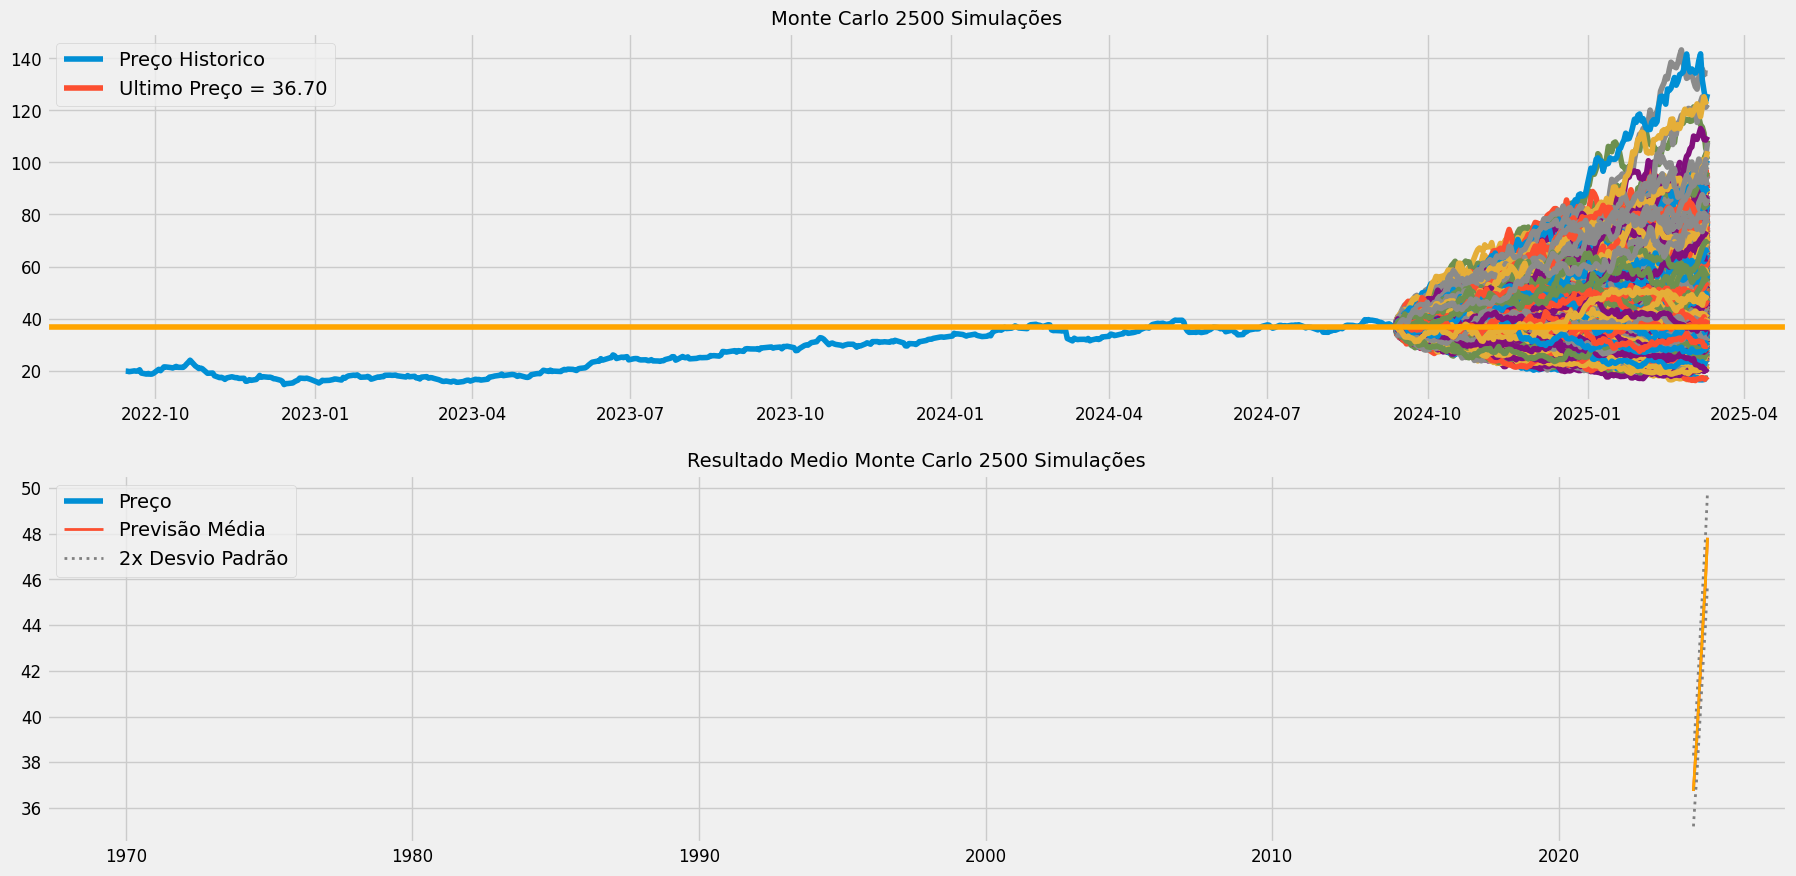

In [48]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)

ax[0].plot(dados["Fechamento"][:"2024-09-13"])

ax[0].plot(resultados)

ax[0].axhline(36.70, c = 'orange')

ax[0].set_title(f"Monte Carlo {simulacoes} Simulações", size = 14)

ax[0].legend(["Preço Historico", "Ultimo Preço = 36.70"])

ax[1].plot(dados["Fechamento"]["2024-09-13"])

ax[1].plot(resultados.apply("mean", axis = 1), lw = 2 )

ax[1].plot(media_resultados.apply(lambda x: x * (1+1.96 * log_desvio_retorno_diario)),
        lw = 2, linestyle = "dotted", c = "gray")

ax[1].plot(media_resultados, lw = 2, c = 'orange')

ax[1].plot(media_resultados.apply(lambda x: x * (1-1.96 * log_desvio_retorno_diario)),
            lw = 2, linestyle = "dotted", color = 'gray')

ax[1].set_title(f"Resultado Medio Monte Carlo {simulacoes} Simulações", size = 14)

ax[1].legend(["Preço", "Previsão Média", "2x Desvio Padrão"])

plt.show()




